## Understanding Underfitting, Overfitting, and Regularization in Regression Models

 We are going to use different variants of regressors to model a sinusoidal function. Use the following code to create a set of non-linear data: import numpy as np np.random.seed(42) m = 1000 X = 5 * np.random.rand(m, 1) - 2.5 y = np.sin(X)*100 + np.random.randn(m, 1)

  1. Apply standardization to the data and plot the learning curve for Linear Regression.
  2. Transform the data into a polynomial of degree 50, apply standardization and plot the learning curve.
  3. Repeat the process for a Regularized Linear Regression model using Ridge Regression with alpha=0.001 and comment on the          differences between the three plots.
  4. Apply 10-fold cross-validation for the simple Linear Regression model and calculate the mean RMSE and its standard        3      deviation.
  5. Apply 10-fold cross-validation for the polynomial model without regularization and calculate the mean RMSE.
  6. Apply 10-fold cross-validation for the regularized model and calculate the mean RMSE.
  7. Comment on your results in the queries 4, 5, and 6

Note: This exercise is a practical application to help us understand how regression works under different conditions — and especially what underfitting, overfitting, and regularization mean, and how regularization helps.


In [1]:
# increase the width of the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
from pathlib import Path
import zipfile
import urllib.request

import numpy as np
import seaborn as sns

#rcParams is a dictionary containing Matplotlib's default settings
#The update() method modifies the settings in rcParams
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

### 1.

In [4]:
#Creating the data. The data follow a sinusoidal curve (sin), but with noise.
#This means they are not linear, so a simple linear model will not capture them well.
np.random.seed(42)
m = 1000
X = 5 * np.random.rand(m, 1) - 2.5
y = np.sin(X)*100 + np.random.randn(m, 1)

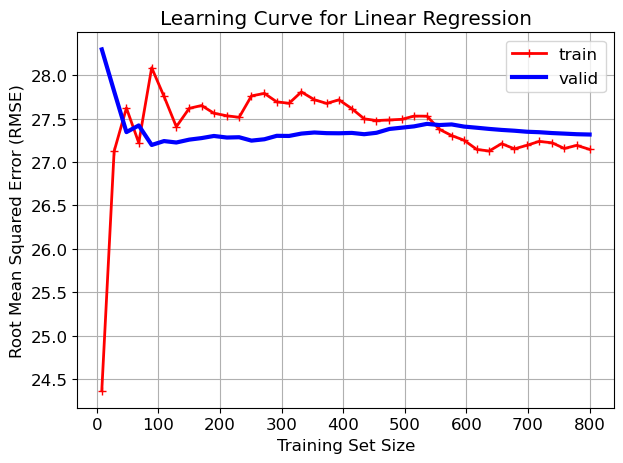

In [5]:
# Apply standardization to the data and plot the learning curve for Linear Regression
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

linear_pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

train_sizes, train_scores, valid_scores = learning_curve(            #train_sizes: sizes of training sets
linear_pipeline, X, y, train_sizes=np.linspace(0.01, 1.0,40),        #train_scores and valid_scores: scores for train/validation
    cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2,label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3,label="valid")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend(loc="best")         # Place the legend in the best location
plt.grid(True)                 # Add a grid for better readability

# Show the plot
plt.tight_layout()             # Adjust layout to fit everything nicely
plt.show()

One way to tell when a model is too simple or too complex is to look at the learning curves. The model has high bias, it ends up underfitting the data. These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high. As a result, both errors fail to decrease no matter how many examples there are in the training set.

When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

Validation error. When the model istrained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite large. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job of modeling the data, so the error ends up at a plateau, very close to the other curve.

### 2.

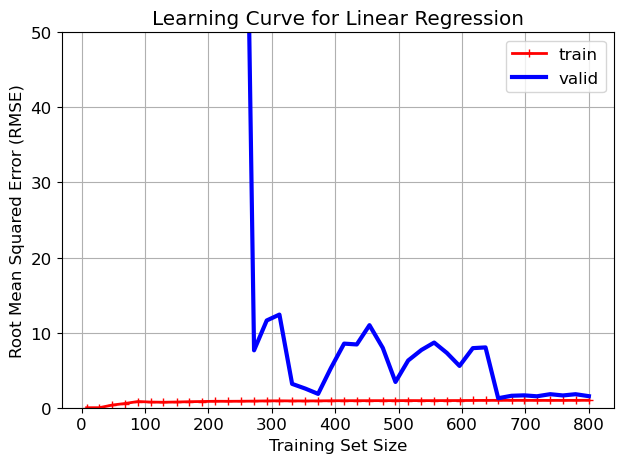

In [12]:
#Linear Regression. Apply simple linear regression (a straight line).
#Goal: to see how a straight line tries to approximate a curve → we will have underfitting.
#The learning curve will show that the model cannot reduce the error much.
#Transform the data into a polynomial of degree 50, apply standardization and plot the learning curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial transformation, scaling, and linear regression

poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=50, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])


# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
        poly_pipeline, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
        scoring="neg_root_mean_squared_error")


# Compute mean and standard deviation of training/test errors


train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_errors, "r-+", linewidth=2,label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3,label="valid")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend(loc="best")         # Place the legend in the best location
plt.grid(True)                 # Add a grid 
plt.ylim(0, 50)
plt.tight_layout()             # Adjust layout to fit everything 
plt.show()


This is an overfitting model. Overfitting occurs when our machine learning model tries to cover all the data points or more than the required data points present in the given dataset. Because of this, the model starts caching noise and inaccurate values present in the dataset, and all these factors reduce the efficiency and accuracy of the model. 
One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

### 3.

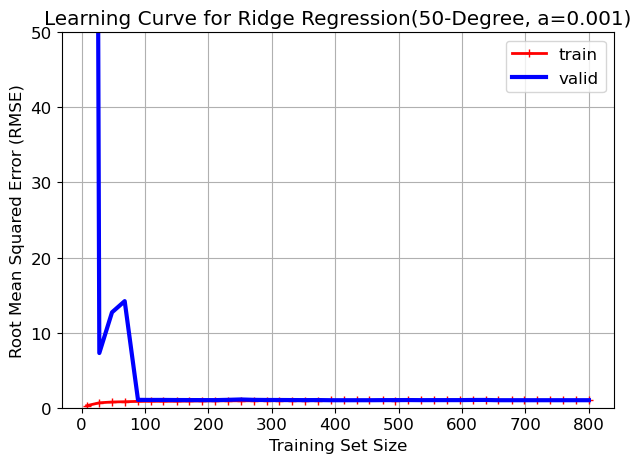

In [11]:
#Polynomial Regression (degree 50)
#Transform the data into polynomial features.This makes the model very powerful and able to “bend” to follow the curve.
#But: since the degree is very high, the model locks onto the noise → overfitting.
#The learning curve will show very small error on the training set but large error on the test set.
#Repeat the process for a Regularized Linear Regression model using Ridge Regression with alpha=0.001 
#and comment on the differences between the three plots.
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.001, solver="cholesky")

ridge_pipeline =  Pipeline([
                    ("poly_features", PolynomialFeatures(degree=50, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", ridge_reg),
                ])

train_sizes, train_scores, valid_scores = learning_curve(
ridge_pipeline, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
 scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2,label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3,label="valid")
plt.title("Learning Curve for Ridge Regression(50-Degree, a=0.001)")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend(loc="best")         # Place the legend in the best location
plt.grid(True)                 # Add a grid 
plt.ylim(0, 50)
plt.tight_layout()             # Adjust layout to fit everything 
plt.show()

Observations οn plots
Linear Regression: the training error is relatively high because the model underfits the data. The validation error remains high even with more training data, as the model cannot capture the non-linear sinusoidal function.
Polynomial Regression (Degree 50): the training error is low, indicating that the model fits the training data well. The validation error is high as the model overfits the data. With larger training sets, the validation error decreases, showing improved generalization.
Ridge Regression (Degree 50, Alpha=0.001): the regularization reduces overfitting, as seen by the smaller gap between the training and validation errors. Validation error is lower compared to Polynomial Regression without regularization, indicating better generalization.
Key Insights
Underfitting: Linear Regression cannot model the sinusoidal function, leading to poor performance. Overfitting: High-degree Polynomial Regression captures noise in the data, reducing generalization. Regularization: Ridge Regression balances the trade-off, controlling overfitting and improving validation performance.

### 4.

In [8]:
#Ridge Regression (Regularization)
#Apply Ridge (regularized polynomial regression).
#This puts a “brake” on the polynomial coefficients so they don’t become excessively large.
#Result: a more balanced model that avoids overfitting.
#Apply 10-fold cross-validation for the simple Linear Regression model and calculate the mean RMSE and its standard deviation.

from sklearn.model_selection import cross_val_score


#Perform 10-Fold Cross-Validation
scores = cross_val_score(LinearRegression(), X, y, cv=10,  scoring="neg_root_mean_squared_error")

#Compute the Mean and Standard Deviation
mean_rmse = -scores.mean()
std_rmse = scores.std()

# Print Results
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard Deviation of RMSE: {std_rmse:.2f}")

Mean RMSE: 27.24
Standard Deviation of RMSE: 1.09


### 5.

In [14]:
#10-fold Cross-validation for the polynomial model without regularization and calculate the meanRMSE.
#Check each model’s performance with cross-validation (splitting the data into 10 folds).
#Measure the mean RMSE and the standard deviation, in order to see: which model is more reliable, which model generalizes better.

scores = cross_val_score(poly_pipeline, X, y, cv=10, scoring="neg_root_mean_squared_error")

# Compute Mean and Standard Deviation of RMSE
mean_rmse = -scores.mean()
std_rmse = scores.std()

# Print the Results
print(f"Mean RMSE: {mean_rmse:.3f}")
print(f"Standard Deviation of RMSE: {std_rmse:.3f}")

Mean RMSE: 1.550
Standard Deviation of RMSE: 1.528


### 6.

In [10]:
# Apply 10-fold cross-validation for the regularized model and calculate the mean RMSE.
scores = cross_val_score(ridge_pipeline, X, y, cv=10, scoring="neg_root_mean_squared_error")

#Compute the Mean RMSE
mean_rmse= -scores.mean()

# Print the Results
print(f"Mean RMSE for Regularized Model (Ridge): {mean_rmse:.3f}")

Mean RMSE for Regularized Model (Ridge): 0.994


### 7.

The RMSE provides an estimation of how well the model is able to predict the target value.Low RMSE values show that the model makes more accurate predictions and fits the data well. Higher levels, on the other hand, imply more significant mistakes and fewer accurate forecasts.

Simple Linear Regression cannot model non-linear data, leading to underfitting(RMSE=27.24).

High-degree Polynomial Regression without regularization leads to overfitting(RMSE=1.550).

Regularized Polynomial Regression provides the best performance as it can better generalise unseen data(RMSE=0.994).